In [13]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from xtbservice.optimize import smiles2ase
from xtbservice.optimize import run_xtb_opt

In [30]:
atoms = smiles2ase('CCCC')

In [52]:
hash(atoms)

TypeError: unhashable type: 'Atoms'

In [33]:
run_xtb_opt(atoms)


          ==================== Thresholds ====================
          CN  :   150.00000
          rep :   500.00000
          disp:  2500.00000
          HB1 :   250.00000
          HB2 :   450.00000

          Pauling EN used:
          Z : 1  EN :  2.20
          Z : 6  EN :  2.55
          electric field strengths (au): 0.000

           ------------------------------------------------- 
          |           Force Field Initialization            |
           ------------------------------------------------- 

          distances ...
          ----------------------------------------
          generating topology and atomic info file ...
          pair mat ...
          computing topology distances matrix with Floyd-Warshall algo ...
          making topology EEQ charges ...
          #fragments for EEQ constrain: 1
          ----------------------------------------
          generating topology and atomic info file ...
          pair mat ...
          computing topology distanc

OptimizationResult(atoms=Atoms(symbols='C4H10', pbc=False, calculator=XTB(...)), forces=array([[ 2.06850222e-05, -3.18668547e-05, -2.83504974e-05],
       [-5.52173966e-06, -1.27797122e-05, -6.73411074e-06],
       [-9.68471503e-06,  1.63785981e-05,  8.84220928e-06],
       [-1.47202506e-05,  9.69084596e-06, -1.49630925e-07],
       [-8.26407130e-06,  6.09531028e-05, -8.98911308e-06],
       [-1.66800675e-05,  3.05688520e-06,  7.85024086e-05],
       [ 3.51565629e-05, -4.66746121e-05, -3.96384804e-06],
       [-3.70501051e-05, -1.53219043e-05, -3.47059083e-06],
       [ 6.60443328e-06,  1.78097995e-05, -2.75022909e-05],
       [-2.39098771e-05,  1.23308392e-05, -2.06221075e-05],
       [ 8.37187118e-06,  2.33765381e-05,  2.29941178e-05],
       [ 2.73393170e-05, -2.12671918e-05, -2.37348693e-05],
       [-1.33653344e-05,  2.15247237e-05,  2.45527389e-07],
       [ 3.10389541e-05, -3.72110573e-05,  1.29327956e-05]]), energy=-53.316224555763235)

In [23]:
mol = Chem.MolFromSmiles('CCCC')

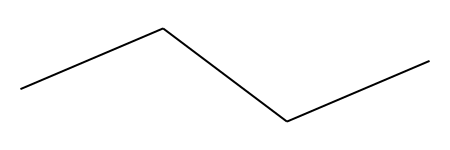

In [24]:
mol

In [36]:
from ase.vibrations import Infrared
from xtb.ase.calculator import XTB

In [40]:
atoms.calc = XTB(method='GFNFF')

In [41]:
ir = Infrared(atoms)

ir.run()

ir.summary()


          ==================== Thresholds ====================
          CN  :   150.00000
          rep :   500.00000
          disp:  2500.00000
          HB1 :   250.00000
          HB2 :   450.00000

          Pauling EN used:
          Z : 1  EN :  2.20
          Z : 6  EN :  2.55
          electric field strengths (au): 0.000

           ------------------------------------------------- 
          |           Force Field Initialization            |
           ------------------------------------------------- 

          distances ...
          ----------------------------------------
          generating topology and atomic info file ...
          pair mat ...
          computing topology distances matrix with Floyd-Warshall algo ...
          making topology EEQ charges ...
          #fragments for EEQ constrain: 1
          ----------------------------------------
          generating topology and atomic info file ...
          pair mat ...
          computing topology distanc

In [45]:
spect = ir.get_spectrum()

In [44]:
import matplotlib.pyplot as plt

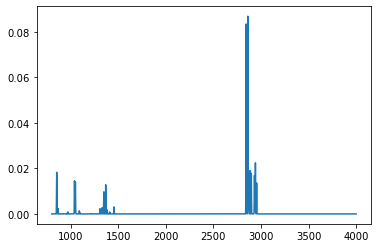

In [46]:
plt.plot(spect[0], spect[1])

In [47]:
spect

[autoreload of xtbservice.optimize failed: Traceback (most recent call last):
  File "/Users/kevinmaikjablonka/opt/miniconda3/envs/xtbservice/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kevinmaikjablonka/opt/miniconda3/envs/xtbservice/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/kevinmaikjablonka/opt/miniconda3/envs/xtbservice/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/kevinmaikjablonka/opt/miniconda3/envs/xtbservice/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 844, in exec_module
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>"

[array([ 800. ,  800.4,  800.8, ..., 3999.2, 3999.6, 4000. ]),
 array([5.25541391e-202, 6.43750099e-199, 7.46011104e-196, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000])]

In [48]:
ir.get_zero_point_energy()

3.460978403064916

In [51]:
ir.